# Analyzing the NYC Subway Dataset
##Questions

###Overview
This project consists of two parts. In Part 1 of the project, you should have completed the questions in Problem Sets 2, 3, and 4 in the Introduction to Data Science course.
This document addresses part 2 of the project. Please use this document as a template and answer the following questions to explain your reasoning and conclusion behind your work in the problem sets. You will attach a document with your answers to these questions as part of your final project submission.



###Section 0. References

Please include a list of references you have used for this project. Please be specific - for example, instead of including a general website such as stackoverflow.com, try to include a specific topic from Stackoverflow that you have found useful.

- http://blog.yhathq.com/posts/facebook-ggplot-tutorial.html
- http://ggplot.yhathq.com/docs/index.html
- http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

In [2]:
import pandas as pd
import pandasql as pdsql
import datetime as dt
import numpy as np
import scipy as sc
import scipy.stats
import statsmodels.api as sm
from sklearn.linear_model import SGDRegressor
from ggplot import *
%matplotlib inline

###Section 1. Statistical Test

####1.1 Which statistical test did you use to analyze the NYC subway data? Did you use a one-tail or a two-tail P value? What is the null hypothesis? What is your p-critical value?

####1.2 Why is this statistical test applicable to the dataset? In particular, consider the assumptions that the test is making about the distribution of ridership in the two samples.

####1.3 What results did you get from this statistical test? These should include the following numerical values: p-values, as well as the means for each of the two samples under test.

####1.4 What is the significance and interpretation of these results?



###Section 2. Linear Regression

####2.1 What approach did you use to compute the coefficients theta and produce prediction for ENTRIESn_hourly in your regression model:
- OLS using Statsmodels or Scikit Learn
- Gradient descent using Scikit Learn
- Or something different?

####2.2 What features (input variables) did you use in your model? Did you use any dummy variables as part of your features?

####2.3 Why did you select these features in your model? We are looking for specific reasons that lead you to believe that the selected features will contribute to the predictive power of your model.
Your reasons might be based on intuition. For example, response for fog might be: “I decided to use fog because I thought that when it is very foggy outside people might decide to use the subway more often.”
Your reasons might also be based on data exploration and experimentation, for example: “I used feature X because as soon as I included it in my model, it drastically improved my R2 value.”  

####2.4 What are the parameters (also known as "coefficients" or "weights") of the non-dummy features in your linear regression model?

####2.5 What is your model’s R2 (coefficients of determination) value?

####2.6 What does this R2 value mean for the goodness of fit for your regression model? Do you think this linear model to predict ridership is appropriate for this dataset, given this R2  value?



###Section 3. Visualization

Please include two visualizations that show the relationships between two or more variables in the NYC subway data.
Remember to add appropriate titles and axes labels to your plots. Also, please add a short description below each figure commenting on the key insights depicted in the figure.

####3.1 One visualization should contain two histograms: one of  ENTRIESn_hourly for rainy days and one of ENTRIESn_hourly for non-rainy days.
You can combine the two histograms in a single plot or you can use two separate plots.
If you decide to use to two separate plots for the two histograms, please ensure that the x-axis limits for both of the plots are identical. It is much easier to compare the two in that case.
For the histograms, you should have intervals representing the volume of ridership (value of ENTRIESn_hourly) on the x-axis and the frequency of occurrence on the y-axis. For example, each interval (along the x-axis), the height of the bar for this interval will represent the number of records (rows in our data) that have ENTRIESn_hourly that falls in this interval.
Remember to increase the number of bins in the histogram (by having larger number of bars). The default bin width is not sufficient to capture the variability in the two samples.

####3.2 One visualization can be more freeform. You should feel free to implement something that we discussed in class (e.g., scatter plots, line plots) or attempt to implement something more advanced if you'd like. Some suggestions are:
Ridership by time-of-day
Ridership by day-of-week

###Section 4. Conclusion

Please address the following questions in detail. Your answers should be 1-2 paragraphs long.

####4.1 From your analysis and interpretation of the data, do more people ride the NYC subway when it is raining or when it is not raining?  

####4.2 What analyses lead you to this conclusion? You should use results from both your statistical tests and your linear regression to support your analysis.

###Section 5. Reflection

Please address the following questions in detail. Your answers should be 1-2 paragraphs long.

####5.1 Please discuss potential shortcomings of the methods of your analysis, including:
- Dataset,
- Analysis, such as the linear regression model or statistical test

####5.2 (Optional) Do you have any other insight about the dataset that you would like to share with us?

## Data Analysis and Source Code

### A.1 Import NYC Subway Data

In [3]:
weather_data = pd.read_csv("turnstile_weather_v2.csv")
weather_data["hour"] = weather_data["hour"].astype('category')
weather_data["rain"] = (weather_data["rain"]+1).astype('category')
weather_data["fog"] = (weather_data["fog"]+1).astype('category')
weather_data.head(3)

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0,0,2011-05-01 00:00:00,0,6,...,30.22,1,55.9,3.5,0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0,0,2011-05-01 04:00:00,4,6,...,30.25,1,52.0,3.5,0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0,0,2011-05-01 12:00:00,12,6,...,30.28,1,62.1,6.9,0,30.258,55.98,7.86,40.700348,-73.887177


### A.2 Exploratory Data Analysis for Features
#### a) Number of Riders over the Day Dependent on Rain

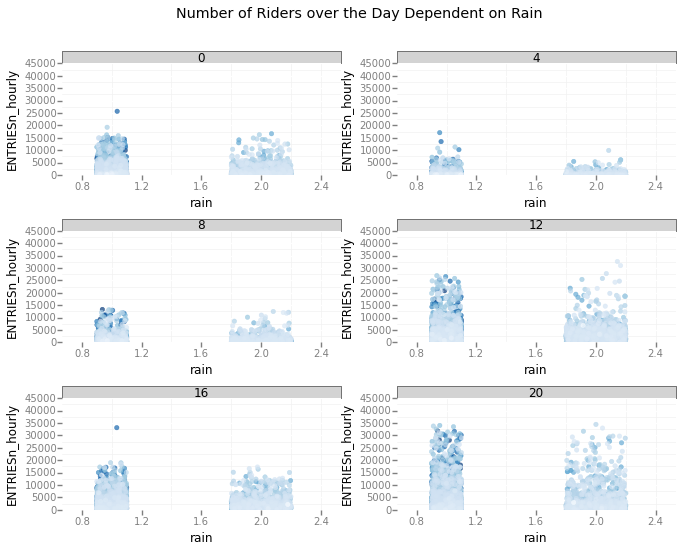

<ggplot: (43556500)>

In [24]:
p = ggplot(aes(x = 'rain', y='ENTRIESn_hourly', color = "meantempi"), data=weather_data)
p + geom_point(position = "jitter", alpha = 0.7) +  scale_y_continuous(limits = [0,45000]) + \
    facet_wrap('hour') + ggtitle("Number of Riders over the Day Dependent on Rain") + theme_bw()

#### b) Number of Riders over the Day Dependent on Weekday

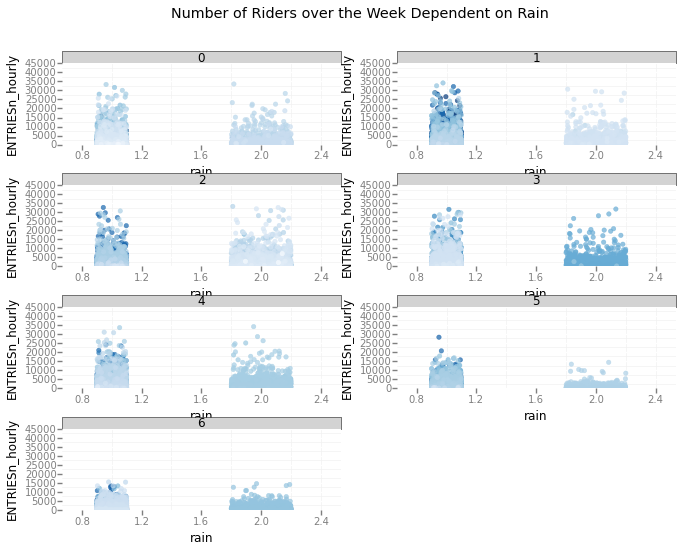

<ggplot: (35601289)>

In [23]:
p = ggplot(aes(x = 'rain', y='ENTRIESn_hourly', color = "meantempi"), data=weather_data)
p + geom_point(position = "jitter", alpha = 0.7) +  scale_y_continuous(limits = [0,45000]) + theme_bw() + \
    facet_wrap('day_week', nrow = 4) + ggtitle("Number of Riders over the Week Dependent on Rain")

#### c) Number of Riders over the Day Dependent on Fog

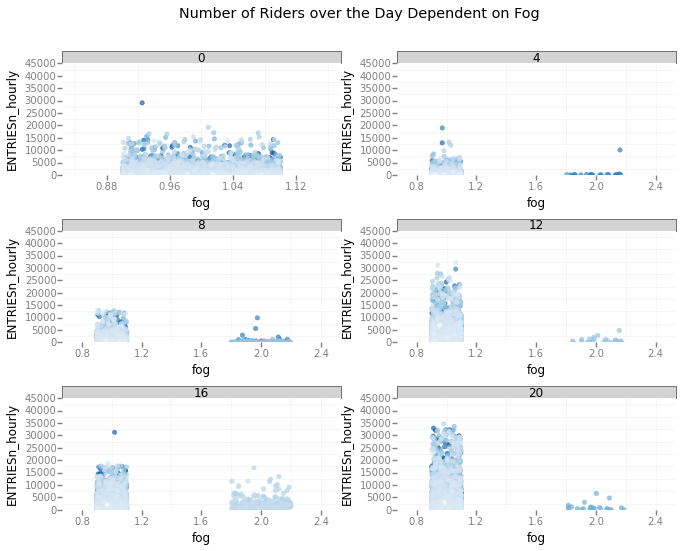

<ggplot: (38316972)>

In [22]:
p = ggplot(aes(x = 'fog', y='ENTRIESn_hourly', color = "meantempi"), data=weather_data)
p + geom_point(position = "jitter", alpha = 0.7) +  scale_y_continuous(limits = [0,45000]) + \
    facet_wrap('hour') + ggtitle("Number of Riders over the Day Dependent on Fog") + theme_bw()

### A.3 Test of Normal Distribution

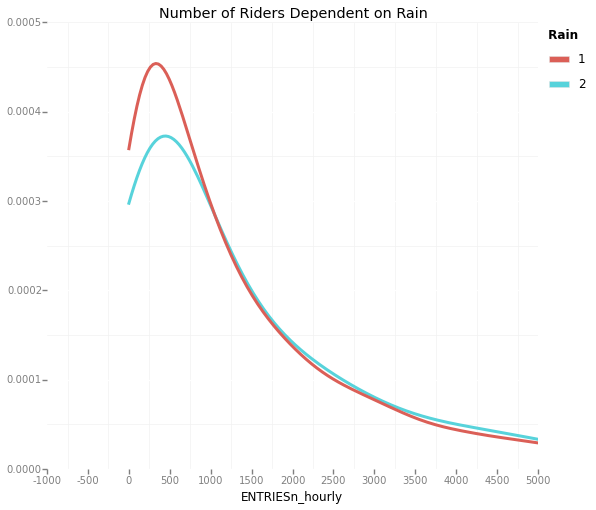

<ggplot: (35249850)>

In [26]:
p = ggplot(aes(x = 'ENTRIESn_hourly', color = 'rain'), data=weather_data)
p + geom_density(size = 3, alpha = 0.25) + theme_bw() + \
    scale_x_continuous(limits = [-1000,5000]) + ggtitle("Number of Riders Dependent on Rain")

Based on the plot, the sample of entries does not seem normally distributed. Hence, the Mann-Whitney-Wilcoxon RankSum test (no assumptions about any underlying distributions) is conducted to test if the two samples of the number of entries in the NYC subway on rainy and non rainy days come from the same population:

H0: The distribution of number of entries on rainy days $F_{rain}(x)$ is identical with the distribution on non rainy days $F_{no-rain}(x-a)$, hence a = 0

H1: The distributions are not the same, a $\neq$ 0

In [52]:
no_rain = weather_data["ENTRIESn_hourly"][weather_data["rain"]==1].dropna() 
with_rain = weather_data["ENTRIESn_hourly"][weather_data["rain"]==2].dropna() 

print no_rain.head()
print with_rain.head()
    
without_rain_mean = np.mean(no_rain)
with_rain_mean = np.mean(with_rain)

print without_rain_mean
print with_rain_mean
    
U, p = sc.stats.mannwhitneyu(no_rain, with_rain)
z, pval = sc.stats.ranksums(no_rain, with_rain)
print U, p
print z, pval

0    0
1    0
2    0
3    0
4    0
Name: ENTRIESn_hourly, dtype: float64
16     83
17     24
18    532
19    454
20    247
Name: ENTRIESn_hourly, dtype: float64
1845.53943866
2028.19603547
153635120.5 nan
-4.54541569645 5.48269387142e-06


### A.4 Linear Regression